In [2]:
import numpy as np
import pandas as pd
from reco_systems.filter import filter_df
from reco_systems.user_game_matrix import *
from reco_systems.CF_knn import *
from reco_systems.evaluation import *
from copy import *
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

%load_ext autoreload
%autoreload 2

#folder = "images/error_metrics/hide_full_matrix"

Création des BDD

In [2]:
folder = "database_cleaned"
avis_clean  = pd.read_csv(f"{folder}/avis_clean.csv", index_col=0)
jeux_clean  = pd.read_csv(f"{folder}/jeux_clean.csv", index_col=0)
users       = pd.read_csv(f"{folder}/users.csv", index_col=0)

min_reviews = 10 # change to set one
rev_filter = filter_df(avis_clean, min_reviews)
center_rev_filter, _ = center_score(rev_filter)

11201 10549
2086 2464
1800 2399
1792 2397
1791 2396


In [3]:
# generate user-game matrix
matrix_ratings, mask_ratings, users_table, games_table = get_matrix_user_game(rev_filter)

# cosine similarity matrix, euclidean similarity matrix
cos_sim_matrix = calc_similarity_matrix(matrix_ratings, mask_ratings, "cos")
eucl_sim_matrix = calc_similarity_matrix(matrix_ratings,mask_ratings,"euclidean")

k = np.linspace(start = 5, stop = 40, num =8)
k

array([ 5., 10., 15., 20., 25., 30., 35., 40.])

In [4]:
 # Create association - User matrix index - User real id - Count reviews

users_ids =  rev_filter[["User id", "Game id"]].groupby("User id", as_index=True).count()
assoc = users_table.to_frame().merge(users_ids, left_on="User id", right_index=True).reset_index()
assoc.columns = ["User index", "User id", "Count reviews"]
max(assoc['Count reviews']) 

1059

In [5]:
np.random.seed(2)
df_cos_small = calc_RMSE_MAE_mean(k.astype(int),assoc,50,200,matrix_ratings,mask_ratings,cos_sim_matrix,dist_type="cos")
df_cos_large = calc_RMSE_MAE_mean(k.astype(int),assoc,200,1060,matrix_ratings,mask_ratings,cos_sim_matrix,dist_type="cos")
df_eucl_small = calc_RMSE_MAE_mean(k.astype(int),assoc,50,200,matrix_ratings,mask_ratings,cos_sim_matrix,dist_type="euclidean")
df_eucl_large = calc_RMSE_MAE_mean(k.astype(int),assoc,200,1060,matrix_ratings,mask_ratings,cos_sim_matrix,dist_type="euclidean")

422
76
422
76


In [6]:
# Saving
df_cos_small.to_csv("generated_data\ df_cos_small.csv",index=False)
df_cos_large.to_csv("generated_data\ df_cos_large.csv",index=False)
df_eucl_small.to_csv("generated_data\ df_eucl_small.csv",index=False)
df_eucl_large.to_csv("generated_data\ df_eucl_large.csv",index=False)

<>:2: SyntaxWarning: invalid escape sequence '\ '
<>:3: SyntaxWarning: invalid escape sequence '\ '
<>:4: SyntaxWarning: invalid escape sequence '\ '
<>:5: SyntaxWarning: invalid escape sequence '\ '
<>:2: SyntaxWarning: invalid escape sequence '\ '
<>:3: SyntaxWarning: invalid escape sequence '\ '
<>:4: SyntaxWarning: invalid escape sequence '\ '
<>:5: SyntaxWarning: invalid escape sequence '\ '
C:\Users\arlyc\AppData\Local\Temp\ipykernel_29988\324799386.py:2: SyntaxWarning: invalid escape sequence '\ '
  df_cos_small.to_csv("generated_data\ df_cos_small.csv",index=False)
C:\Users\arlyc\AppData\Local\Temp\ipykernel_29988\324799386.py:3: SyntaxWarning: invalid escape sequence '\ '
  df_cos_large.to_csv("generated_data\ df_cos_large.csv",index=False)
C:\Users\arlyc\AppData\Local\Temp\ipykernel_29988\324799386.py:4: SyntaxWarning: invalid escape sequence '\ '
  df_eucl_small.to_csv("generated_data\ df_eucl_small.csv",index=False)
C:\Users\arlyc\AppData\Local\Temp\ipykernel_29988\32479938

In [7]:
# Functions for df_small

vect_rmse_mean_cos_s = np.vectorize(lambda x : np.mean((df_cos_small[(df_cos_small['K'] == x) & (df_cos_small['Type'] == "RMSE")]['Value']).dropna().to_numpy()))
vect_mae_mean_cos_s = np.vectorize(lambda x : np.mean((df_cos_small[(df_cos_small['K'] == x) & (df_cos_small['Type'] == "MAE")]['Value']).dropna().to_numpy()))
vect_rmse_mean_eucl_s = np.vectorize(lambda x : np.mean((df_eucl_small[(df_eucl_small['K'] == x) & (df_eucl_small['Type'] == "RMSE")]['Value']).dropna().to_numpy()))
vect_mae_mean_eucl_s = np.vectorize(lambda x : np.mean((df_eucl_small[(df_eucl_small['K'] == x) & (df_eucl_small['Type'] == "MAE")]['Value']).dropna().to_numpy()))

rmse_mean_cos_s = vect_rmse_mean_cos_s(k.astype(int))
mae_mean_cos_s = vect_mae_mean_cos_s(k)

rmse_mean_eucl_s = vect_rmse_mean_eucl_s(k)
mae_mean_eucl_s = vect_mae_mean_eucl_s(k)


In [8]:
df_cos_small

,K,Type,Value
0,5,RMSE,2.055227
1,5,RMSE,1.588323
2,5,RMSE,1.760911
3,5,RMSE,2.778805
4,5,RMSE,1.914751
...,...,...,...
6747,40,MAE,1.907146
6748,40,MAE,1.425147
6749,40,MAE,1.007952
6750,40,MAE,2.630037


In [9]:
# Functions for df_large
vect_rmse_mean_cos_l = np.vectorize(lambda x : np.mean((df_cos_large[(df_cos_large['K'] == x) & (df_cos_large['Type'] == "RMSE")]['Value']).dropna().to_numpy()))
vect_mae_mean_cos_l = np.vectorize(lambda x : np.mean((df_cos_large[(df_cos_large['K'] == x) & (df_cos_large['Type'] == "MAE")]['Value']).dropna().to_numpy()))
vect_rmse_mean_eucl_l = np.vectorize(lambda x : np.mean((df_eucl_large[(df_eucl_large['K'] == x) & (df_eucl_large['Type'] == "RMSE")]['Value']).dropna().to_numpy()))
vect_mae_mean_eucl_l = np.vectorize(lambda x : np.mean((df_eucl_large[(df_eucl_large['K'] == x) & (df_eucl_large['Type'] == "MAE")]['Value']).dropna().to_numpy()))

rmse_mean_cos_l = vect_rmse_mean_cos_l(k)
mae_mean_cos_l = vect_mae_mean_cos_l(k)

rmse_mean_eucl_l = vect_rmse_mean_eucl_l(k)
mae_mean_eucl_l = vect_mae_mean_eucl_l(k)


In [10]:
data = pd.DataFrame({'k' : k, 'RMSE mean' : rmse_mean_cos_s})
data

,k,RMSE mean
0,5.0,2.279317
1,10.0,2.180200
2,15.0,2.132634
3,20.0,2.106162
4,25.0,2.079829
5,30.0,2.059904
6,35.0,2.046707
7,40.0,2.037887


<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
C:\Users\arlyc\AppData\Local\Temp\ipykernel_29988\2005568976.py:4: SyntaxWarning: invalid escape sequence '\e'
  plt.savefig("images\error_metrics\hide_users\cos_rmse_50_200.png")


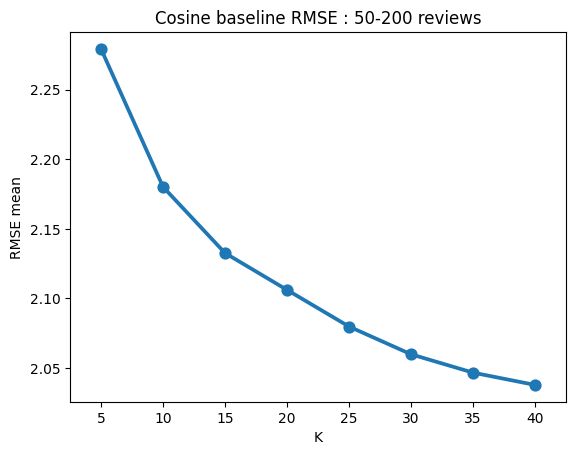

In [11]:
#SNS point plot for small
sns.pointplot(data=pd.DataFrame({'K' : k.astype(int), 'RMSE mean' : rmse_mean_cos_s}), x="K", y="RMSE mean", markers="o")
plt.title("Cosine baseline RMSE : 50-200 reviews")
plt.savefig("images\error_metrics\hide_users\cos_rmse_50_200.png")
plt.show()

<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
C:\Users\arlyc\AppData\Local\Temp\ipykernel_29988\1458803219.py:3: SyntaxWarning: invalid escape sequence '\e'
  plt.savefig("images\error_metrics\hide_users\cos_mae_50_200.png")


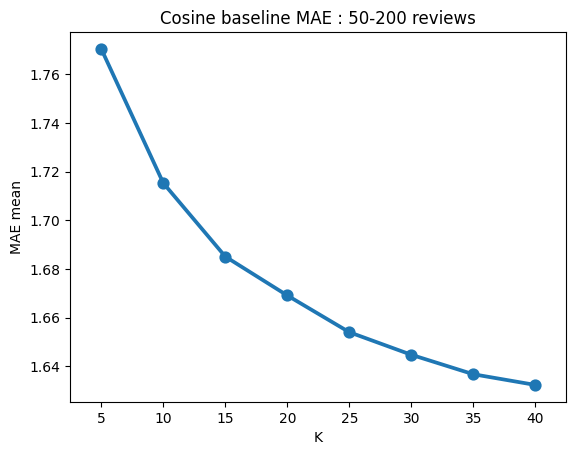

In [12]:
sns.pointplot(data=pd.DataFrame({'K' : k.astype(int), 'MAE mean' : mae_mean_cos_s}),x="K",y="MAE mean", marker="o")
plt.title("Cosine baseline MAE : 50-200 reviews")
plt.savefig("images\error_metrics\hide_users\cos_mae_50_200.png")
plt.show()

<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
C:\Users\arlyc\AppData\Local\Temp\ipykernel_29988\3557266221.py:3: SyntaxWarning: invalid escape sequence '\e'
  plt.savefig("images\error_metrics\hide_users\eucl_rmse_50_200.png")


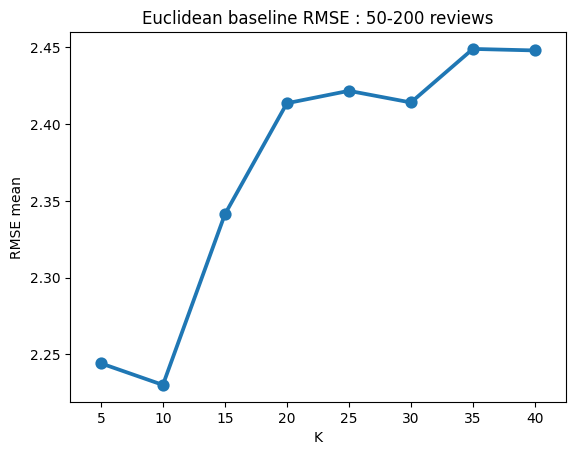

In [13]:
sns.pointplot(data=pd.DataFrame({'K' : k.astype(int), 'RMSE mean' : rmse_mean_eucl_s}), x="K", y="RMSE mean",marker="o")
plt.title("Euclidean baseline RMSE : 50-200 reviews")
plt.savefig("images\error_metrics\hide_users\eucl_rmse_50_200.png")
plt.show()

<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
C:\Users\arlyc\AppData\Local\Temp\ipykernel_29988\296584882.py:3: SyntaxWarning: invalid escape sequence '\e'
  plt.savefig("images\error_metrics\hide_users\eucl_mae_50_200.png")


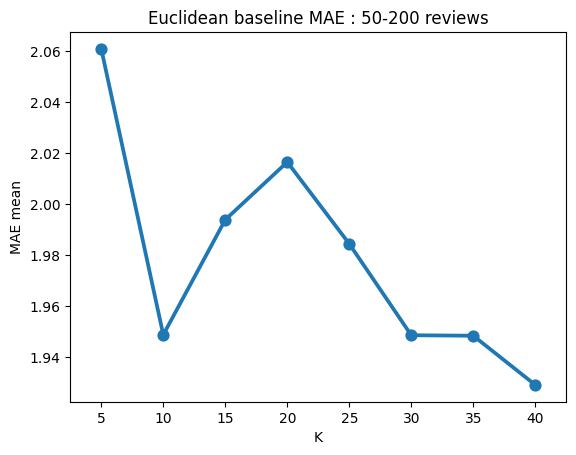

In [14]:
sns.pointplot(data=pd.DataFrame({'K' : k.astype(int), 'MAE mean' : mae_mean_eucl_s}),x="K",y="MAE mean")
plt.title("Euclidean baseline MAE : 50-200 reviews")
plt.savefig("images\error_metrics\hide_users\eucl_mae_50_200.png")
plt.show()

<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
C:\Users\arlyc\AppData\Local\Temp\ipykernel_29988\15765665.py:4: SyntaxWarning: invalid escape sequence '\e'
  plt.savefig("images\error_metrics\hide_users\eucl_rmse_top76.png")


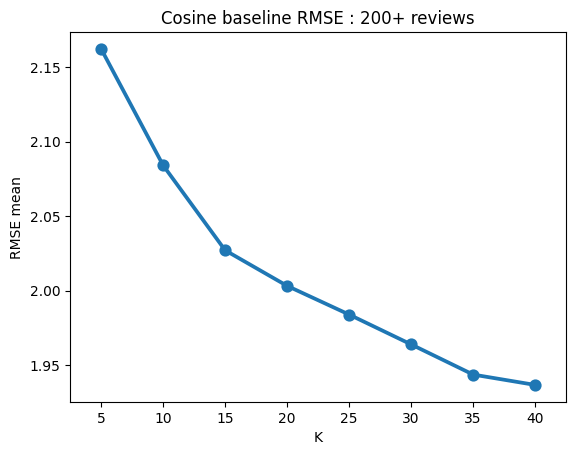

In [15]:
# SNS pointplot for large
sns.pointplot(data=pd.DataFrame({'K' : k.astype(int), 'RMSE mean' : rmse_mean_cos_l}),x="K",y="RMSE mean")
plt.title("Cosine baseline RMSE : 200+ reviews")
plt.savefig("images\error_metrics\hide_users\eucl_rmse_top76.png")
plt.show()

<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
C:\Users\arlyc\AppData\Local\Temp\ipykernel_29988\3843114334.py:3: SyntaxWarning: invalid escape sequence '\e'
  plt.savefig("images\error_metrics\hide_users\cos_mae_top76.png")


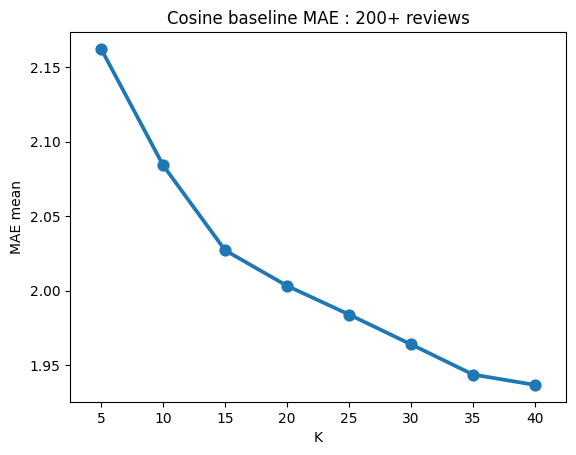

In [16]:
sns.pointplot(data=pd.DataFrame({'K' : k.astype(int), 'MAE mean' : rmse_mean_cos_l}),x="K",y="MAE mean")
plt.title("Cosine baseline MAE : 200+ reviews")
plt.savefig("images\error_metrics\hide_users\cos_mae_top76.png")
plt.show()

<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
C:\Users\arlyc\AppData\Local\Temp\ipykernel_29988\2673884217.py:4: SyntaxWarning: invalid escape sequence '\e'
  plt.savefig("images\error_metrics\hide_users\eucl_rmse_top76.png")


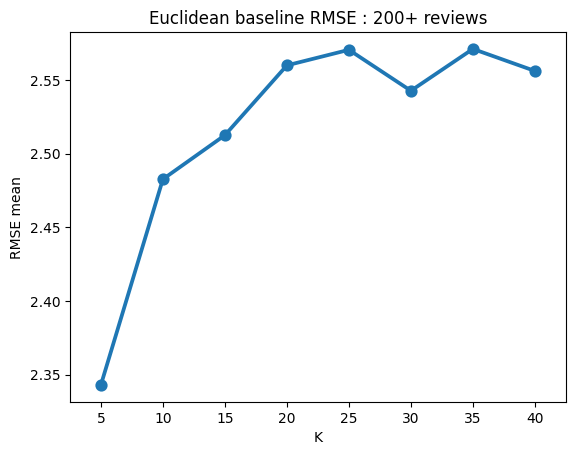

In [17]:
# SNS pointplot for large
sns.pointplot(data=pd.DataFrame({'K' : k.astype(int), 'RMSE mean' : rmse_mean_eucl_l}),x="K",y="RMSE mean")
plt.title("Euclidean baseline RMSE : 200+ reviews")
plt.savefig("images\error_metrics\hide_users\eucl_rmse_top76.png")
plt.show()

<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
C:\Users\arlyc\AppData\Local\Temp\ipykernel_29988\3906209152.py:3: SyntaxWarning: invalid escape sequence '\e'
  plt.savefig("images\error_metrics\hide_users\eucl_mae_top76.png")


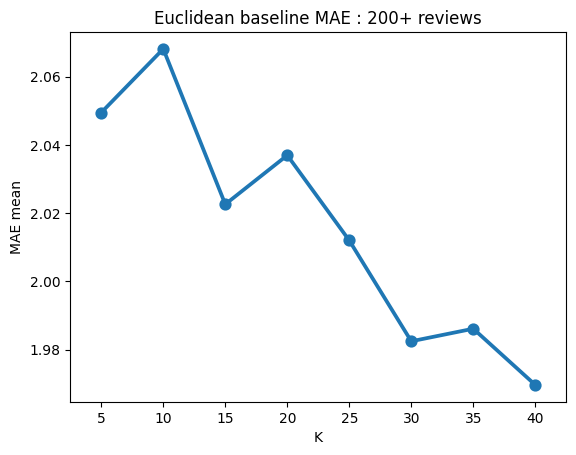

In [18]:
sns.pointplot(data=pd.DataFrame({'K' : k.astype(int), 'MAE mean' : mae_mean_eucl_l}),x="K",y="MAE mean")
plt.title("Euclidean baseline MAE : 200+ reviews")
plt.savefig("images\error_metrics\hide_users\eucl_mae_top76.png")
plt.show()

In [19]:
# Distance matrix
#TODO

# v_recalc_cos = np.vectorize(lambda x : recalc_cos_similarity(x,matrix_ratings,cos_sim_matrix))
# v_recalc_eucl = np.vectorize(lambda x : recalc_eucl_similarity(x,matrix_ratings,eucl_sim_matrix))

# users = ma

In [20]:
# Centered data 

# filter data with the minimum reviews
filtered_data = filter_df(avis_clean, min_reviews)

# we center the ratings for the centered cos version
filtered_centrd_data, avg_df = center_score(filtered_data)

# Cos et eucl sim_matrix
matrix_ratings, mask_ratings, users_table_assoc, games_table_assoc = get_matrix_user_game(filtered_centrd_data)
cos_sim_matrix = calc_similarity_matrix(matrix_ratings,mask_ratings,dist_type="cos")

11201 10549
2086 2464
1800 2399
1792 2397
1791 2396


In [21]:
# RMSE & MAE mean :df_small

df_cos_centered_s = calc_RMSE_MAE_mean(k.astype(int),assoc,50,200,matrix_ratings,mask_ratings,cos_sim_matrix,dist_type="cos")
df_eucl_centered_s = calc_RMSE_MAE_mean(k.astype(int),assoc,200,1060,matrix_ratings,mask_ratings,cos_sim_matrix,dist_type="euclidean")

vect_rmse_mean_cos_cs = np.vectorize(lambda x : np.mean((df_cos_centered_s[(df_cos_centered_s['K'] == x) & (df_cos_centered_s['Type'] == "RMSE")]['Value']).dropna().to_numpy()))
vect_mae_mean_cos_cs = np.vectorize(lambda x : np.mean((df_cos_centered_s[(df_cos_centered_s['K'] == x) & (df_cos_centered_s['Type'] == "MAE")]['Value']).dropna().to_numpy()))
vect_rmse_mean_eucl_cs = np.vectorize(lambda x : np.mean((df_eucl_centered_s[(df_eucl_centered_s['K'] == x) & (df_eucl_centered_s['Type'] == "RMSE")]['Value']).dropna().to_numpy()))
vect_mae_mean_eucl_cs = np.vectorize(lambda x : np.mean((df_eucl_centered_s[(df_eucl_centered_s['K'] == x) & (df_eucl_centered_s['Type'] == "MAE")]['Value']).dropna().to_numpy()))

rmse_mean_cos_cs = vect_rmse_mean_cos_cs(k)
mae_mean_cos_cs = vect_mae_mean_cos_cs(k)
rmse_mean_eucl_cs = vect_rmse_mean_eucl_cs(k)
mae_mean_eucl_cs = vect_mae_mean_eucl_cs(k)

422
76


In [22]:
# RMSE & MAE mean : df_large

df_cos_centered_l = calc_RMSE_MAE_mean(k.astype(int),assoc,50,200,matrix_ratings,mask_ratings,cos_sim_matrix,dist_type="cos")
df_eucl_centered_l = calc_RMSE_MAE_mean(k.astype(int),assoc,200,1060,matrix_ratings,mask_ratings,cos_sim_matrix,dist_type="euclidean")

vect_rmse_mean_cos_cl = np.vectorize(lambda x : np.mean((df_cos_centered_l[(df_cos_centered_l['K'] == x) & (df_cos_centered_l['Type'] == "RMSE")]['Value']).dropna().to_numpy()))
vect_mae_mean_cos_cl = np.vectorize(lambda x : np.mean((df_cos_centered_l[(df_cos_centered_l['K'] == x) & (df_cos_centered_l['Type'] == "MAE")]['Value']).dropna().to_numpy()))
vect_rmse_mean_eucl_cl = np.vectorize(lambda x : np.mean((df_eucl_centered_l[(df_eucl_centered_l['K'] == x) & (df_eucl_centered_l['Type'] == "RMSE")]['Value']).dropna().to_numpy()))
vect_mae_mean_eucl_cl = np.vectorize(lambda x : np.mean((df_eucl_centered_l[(df_eucl_centered_l['K'] == x) & (df_eucl_centered_l['Type'] == "MAE")]['Value']).dropna().to_numpy()))

rmse_mean_cos_cl = vect_rmse_mean_cos_cl(k)
mae_mean_cos_cl = vect_mae_mean_cos_cl(k)
rmse_mean_eucl_cl = vect_rmse_mean_eucl_cl(k)
mae_mean_eucl_cl = vect_mae_mean_eucl_cl(k)

422
76


<>:5: SyntaxWarning: invalid escape sequence '\e'
<>:5: SyntaxWarning: invalid escape sequence '\e'
C:\Users\arlyc\AppData\Local\Temp\ipykernel_29988\3598858054.py:5: SyntaxWarning: invalid escape sequence '\e'
  plt.savefig("images\error_metrics\hide_users\cos_center_rmse_50-200.png")


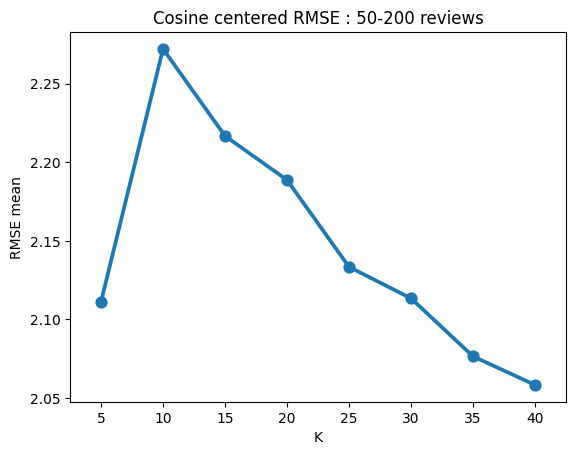

In [23]:
# RMSE Centered cos 50-200

sns.pointplot(data=pd.DataFrame({'K' : k.astype(int), 'RMSE mean' : rmse_mean_cos_cs}),x="K",y="RMSE mean")
plt.title("Cosine centered RMSE : 50-200 reviews")
plt.savefig("images\error_metrics\hide_users\cos_center_rmse_50-200.png")
plt.show()

<>:5: SyntaxWarning: invalid escape sequence '\e'
<>:5: SyntaxWarning: invalid escape sequence '\e'
C:\Users\arlyc\AppData\Local\Temp\ipykernel_29988\2856398271.py:5: SyntaxWarning: invalid escape sequence '\e'
  plt.savefig("images\error_metrics\hide_users\cos_center_mae_50-200.png")


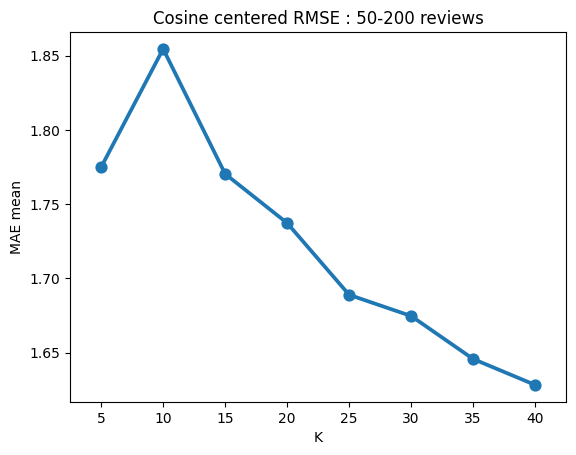

In [24]:
# MAE Centered cos 50-200

sns.pointplot(data=pd.DataFrame({'K' : k.astype(int), 'MAE mean' : mae_mean_cos_cs}),x="K",y="MAE mean")
plt.title("Cosine centered RMSE : 50-200 reviews")
plt.savefig("images\error_metrics\hide_users\cos_center_mae_50-200.png")
plt.show()

<>:5: SyntaxWarning: invalid escape sequence '\e'
<>:5: SyntaxWarning: invalid escape sequence '\e'
C:\Users\arlyc\AppData\Local\Temp\ipykernel_29988\1610367429.py:5: SyntaxWarning: invalid escape sequence '\e'
  plt.savefig("images\error_metrics\hide_users\eucl_center_rmse_50-200.png")


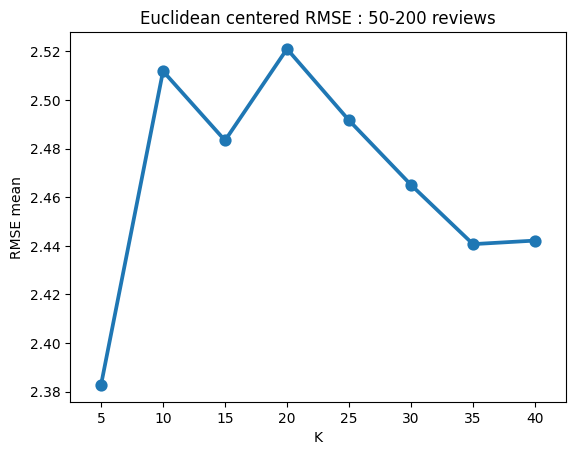

In [25]:
# RMSE Centered euclid 50-200

sns.pointplot(data=pd.DataFrame({'K' : k.astype(int), 'RMSE mean' : rmse_mean_eucl_cs}),x="K",y="RMSE mean")
plt.title("Euclidean centered RMSE : 50-200 reviews")
plt.savefig("images\error_metrics\hide_users\eucl_center_rmse_50-200.png")
plt.show()

<>:5: SyntaxWarning: invalid escape sequence '\e'
<>:5: SyntaxWarning: invalid escape sequence '\e'
C:\Users\arlyc\AppData\Local\Temp\ipykernel_29988\3760092897.py:5: SyntaxWarning: invalid escape sequence '\e'
  plt.savefig("images\error_metrics\hide_users\eucl_center_mae_50-200.png")


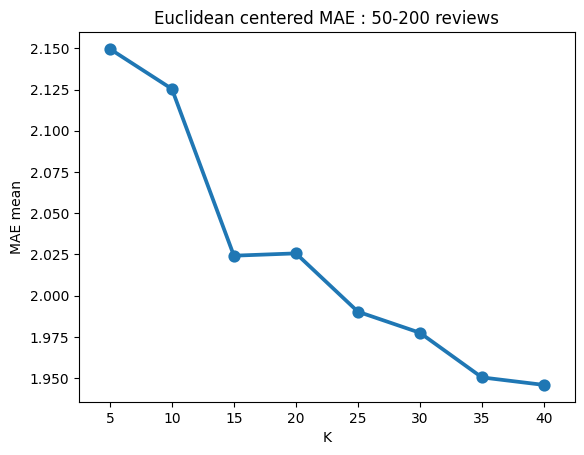

In [26]:
# MAE Centered eucl 50-200

sns.pointplot(data=pd.DataFrame({'K' : k.astype(int), 'MAE mean' : mae_mean_eucl_cs}),x="K",y="MAE mean")
plt.title("Euclidean centered MAE : 50-200 reviews")
plt.savefig("images\error_metrics\hide_users\eucl_center_mae_50-200.png")
plt.show()

<>:5: SyntaxWarning: invalid escape sequence '\e'
<>:5: SyntaxWarning: invalid escape sequence '\e'
C:\Users\arlyc\AppData\Local\Temp\ipykernel_29988\3014384201.py:5: SyntaxWarning: invalid escape sequence '\e'
  plt.savefig("images\error_metrics\hide_users\cos_center_rmse_top76.png")


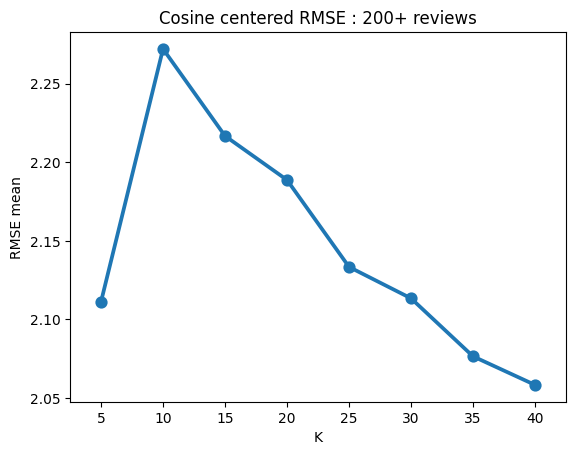

In [27]:
# RMSE Centered cosine 200+

sns.pointplot(data=pd.DataFrame({'K' : k.astype(int), 'RMSE mean' : rmse_mean_cos_cl}),x="K",y="RMSE mean")
plt.title("Cosine centered RMSE : 200+ reviews")
plt.savefig("images\error_metrics\hide_users\cos_center_rmse_top76.png")
plt.show()

<>:5: SyntaxWarning: invalid escape sequence '\e'
<>:5: SyntaxWarning: invalid escape sequence '\e'
C:\Users\arlyc\AppData\Local\Temp\ipykernel_29988\2412522057.py:5: SyntaxWarning: invalid escape sequence '\e'
  plt.savefig("images\error_metrics\hide_users\cos_center_mae_top76.png")


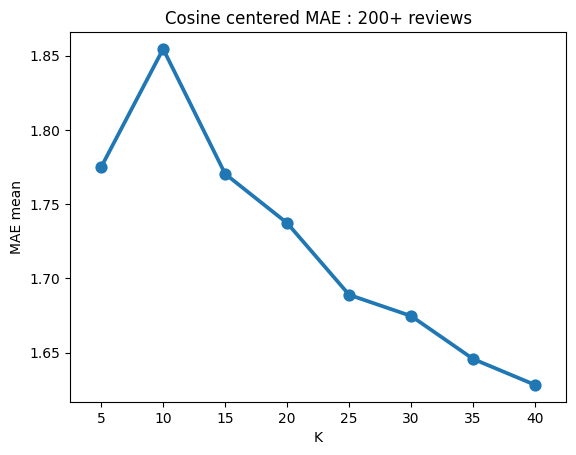

In [29]:
# MAE Centered cosine 200+

sns.pointplot(data=pd.DataFrame({'K' : k.astype(int), 'MAE mean' : mae_mean_cos_cl}),x="K",y="MAE mean")
plt.title("Cosine centered MAE : 200+ reviews")
plt.savefig("images\error_metrics\hide_users\cos_center_mae_top76.png")
plt.show()

<>:5: SyntaxWarning: invalid escape sequence '\e'
<>:5: SyntaxWarning: invalid escape sequence '\e'
C:\Users\arlyc\AppData\Local\Temp\ipykernel_29988\1262682598.py:5: SyntaxWarning: invalid escape sequence '\e'
  plt.savefig("images\error_metrics\hide_users\eucl_center_rmse_top76.png")


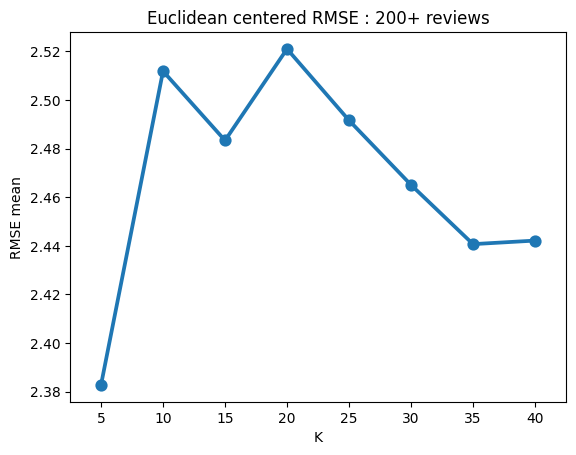

In [30]:
# RMSE Centered eucl 200+

sns.pointplot(data=pd.DataFrame({'K' : k.astype(int), 'RMSE mean' : rmse_mean_eucl_cl}),x="K",y="RMSE mean")
plt.title("Euclidean centered RMSE : 200+ reviews")
plt.savefig("images\error_metrics\hide_users\eucl_center_rmse_top76.png")
plt.show()

<>:5: SyntaxWarning: invalid escape sequence '\e'
<>:5: SyntaxWarning: invalid escape sequence '\e'
C:\Users\arlyc\AppData\Local\Temp\ipykernel_29988\3755234516.py:5: SyntaxWarning: invalid escape sequence '\e'
  plt.savefig("images\error_metrics\hide_users\eucl_center_rmse_top76.png")


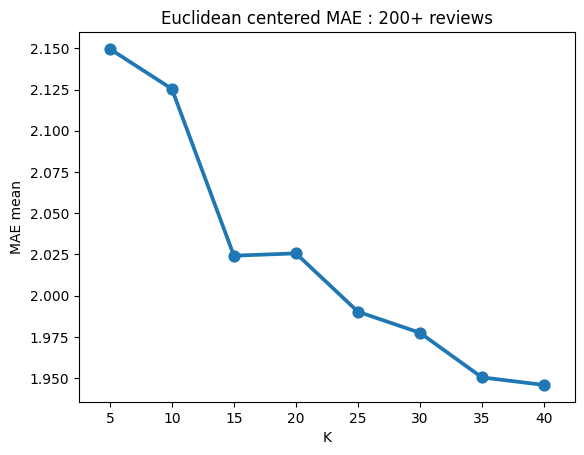

In [ ]:
# MAE Centered eucl 200+

sns.pointplot(data=pd.DataFrame({'K' : k.astype(int), 'MAE mean' : mae_mean_eucl_cl}),x="K",y="MAE mean")
plt.title("Euclidean centered MAE : 200+ reviews")
plt.savefig("images\error_metrics\hide_users\eucl_center_mae_top76.png")
plt.show()

<>:1: SyntaxWarning: invalid escape sequence '\ '
<>:6: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\ '
<>:6: SyntaxWarning: invalid escape sequence '\e'
C:\Users\arlyc\AppData\Local\Temp\ipykernel_29512\792005826.py:1: SyntaxWarning: invalid escape sequence '\ '
  df_cos_large = pd.read_csv("generated_data\ df_cos_large.csv")
C:\Users\arlyc\AppData\Local\Temp\ipykernel_29512\792005826.py:6: SyntaxWarning: invalid escape sequence '\e'
  plt.savefig("images\error_metrics\hide_users\cos_base_top76.png")


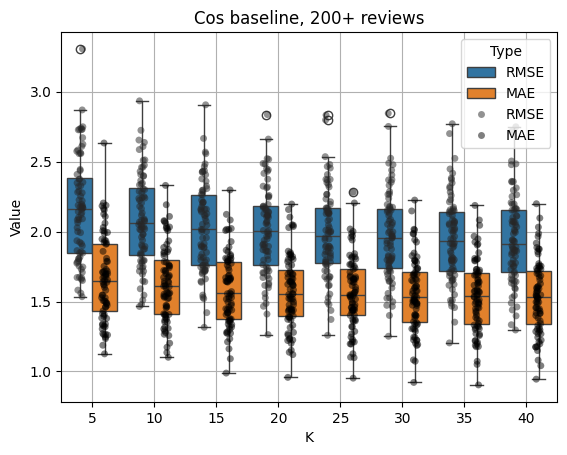

In [14]:
df_cos_large = pd.read_csv("generated_data\ df_cos_large.csv")
gfg = sns.boxplot(df_cos_large,x="K",y='Value', hue="Type")
sns.stripplot(df_cos_large,x="K",y="Value",hue="Type",dodge=True,alpha=0.5, palette='dark:black')
plt.grid()
plt.title("Cos baseline, 200+ reviews")
plt.savefig("images\error_metrics\hide_users\cos_base_top76.png")